In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [4]:
data = pd.read_csv(r"D:\edge Downloads\tesla stock price\Tesla.csv - Tesla.csv.csv")
data = data[['Date', 'Close']]  # Use the 'Close' price for prediction
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [6]:
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

time_step = 60
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [8]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1)) 

model.compile(optimizer='adam', loss='mean_squared_error')


D:\users\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 25s 150ms/step - loss: 0.0517 - val_loss: 0.0032
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 0.0010 - val_loss: 0.0015
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 9.9580e-04 - val_loss: 0.0014
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 11/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 8.8554e-04 - val_loss: 0.0013
Epoch 12/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step -

In [12]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


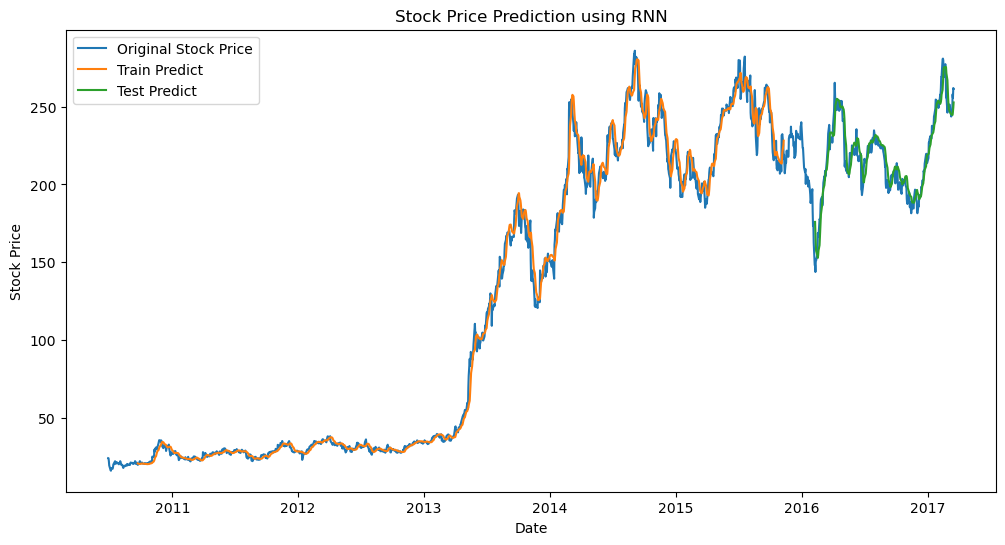

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Original Stock Price')
plt.plot(data.index[time_step:train_size], train_predict, label='Train Predict')
plt.plot(data.index[train_size + time_step:], test_predict, label='Test Predict')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using RNN')
plt.legend()
plt.show()


In [16]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(Y_train, train_predict)
test_mse = mean_squared_error(Y_test, test_predict)
print(f'Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')


Train MSE: 43.8911, Test MSE: 65.8947
